In [2]:
import numpy as np
import math, os
import helper_fcns as hf
import autoreload
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pltSave
import seaborn as sns
sns.set(style='ticks')
% matplotlib inline

import pdb

# constants - directories
data_loc = '/Users/paulgerald/work/sfDiversity/sfDiv-OriModel/sfDiv-python/LGN/sach-data/';
data_name = 'sachData.npy'

In [3]:
sdp = np.load(data_loc + data_name).item()

### Some simple plotting

In [8]:
sdp[0]['data'].keys()

dict_keys(['cont', 'sf', 'f0', 'f0sem', 'f1', 'f1sem', 'f1_psth', 'f1ph', 'f1ph_sem', 'f1_psth_phase', 'psth', 'psth_sem', 'tf', 'cntr_size', 'surr_inner', 'opac0', 'opac1', 'addunit', 'size', 'phase_cntr', 'f1cntr', 'f1cntr_sem', 'f1cntr_psth', 'phase_surr', 'f1surr', 'f1surr_sem', 'f1surr_psth', 'f1sd', 'f0sd', 'f0arr', 'f1arr', 'f1pharr', 'psth2', 'psth2_sd', 'psth2_sem'])

In [10]:
len(sdp[0]['data']['f0arr'])

192

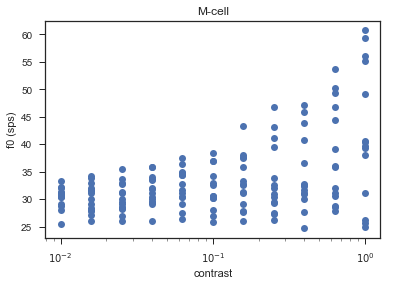

In [6]:
cellNum = 31;
plt.semilogx(sdp[cellNum-1]['data']['cont'], sdp[cellNum-1]['data']['f0'], 'o')
plt.xlabel('contrast'); plt.ylabel('f0 (sps)');
plt.title('%s' % sdp[cellNum-1]['cellType']);

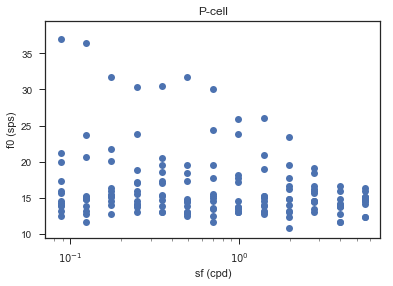

In [32]:
cellNum = 15;
plt.semilogx(sdp[cellNum-1]['data']['sf'], sdp[cellNum-1]['data']['f0'], 'o')
plt.xlabel('sf (cpd)'); plt.ylabel('f0 (sps)');
plt.title('%s' % sdp[cellNum-1]['cellType']);

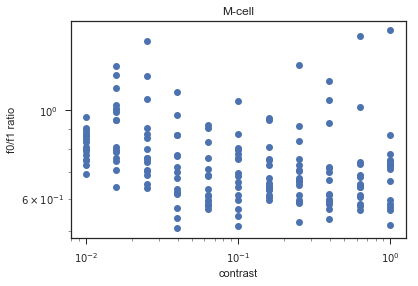

In [33]:
cellNum = 1;
plt.loglog(sdp[cellNum-1]['data']['cont'], np.divide(sdp[cellNum-1]['data']['f0'], sdp[cellNum-1]['data']['f1']), 'o')
plt.xlabel('contrast'); plt.ylabel('f0/f1 ratio');
plt.title('%s' % sdp[cellNum-1]['cellType']);

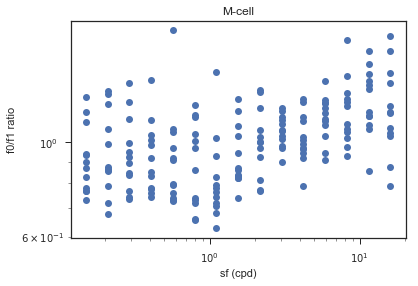

In [34]:
cellNum = 2;
plt.loglog(sdp[cellNum-1]['data']['sf'], np.divide(sdp[cellNum-1]['data']['f0'], sdp[cellNum-1]['data']['f1']), 'o')
plt.xlabel('sf (cpd)'); plt.ylabel('f0/f1 ratio');
plt.title('%s' % sdp[cellNum-1]['cellType']);

### Now, organized plotting

Spatial frequency tuning

In [88]:
autoreload.reload(hf);

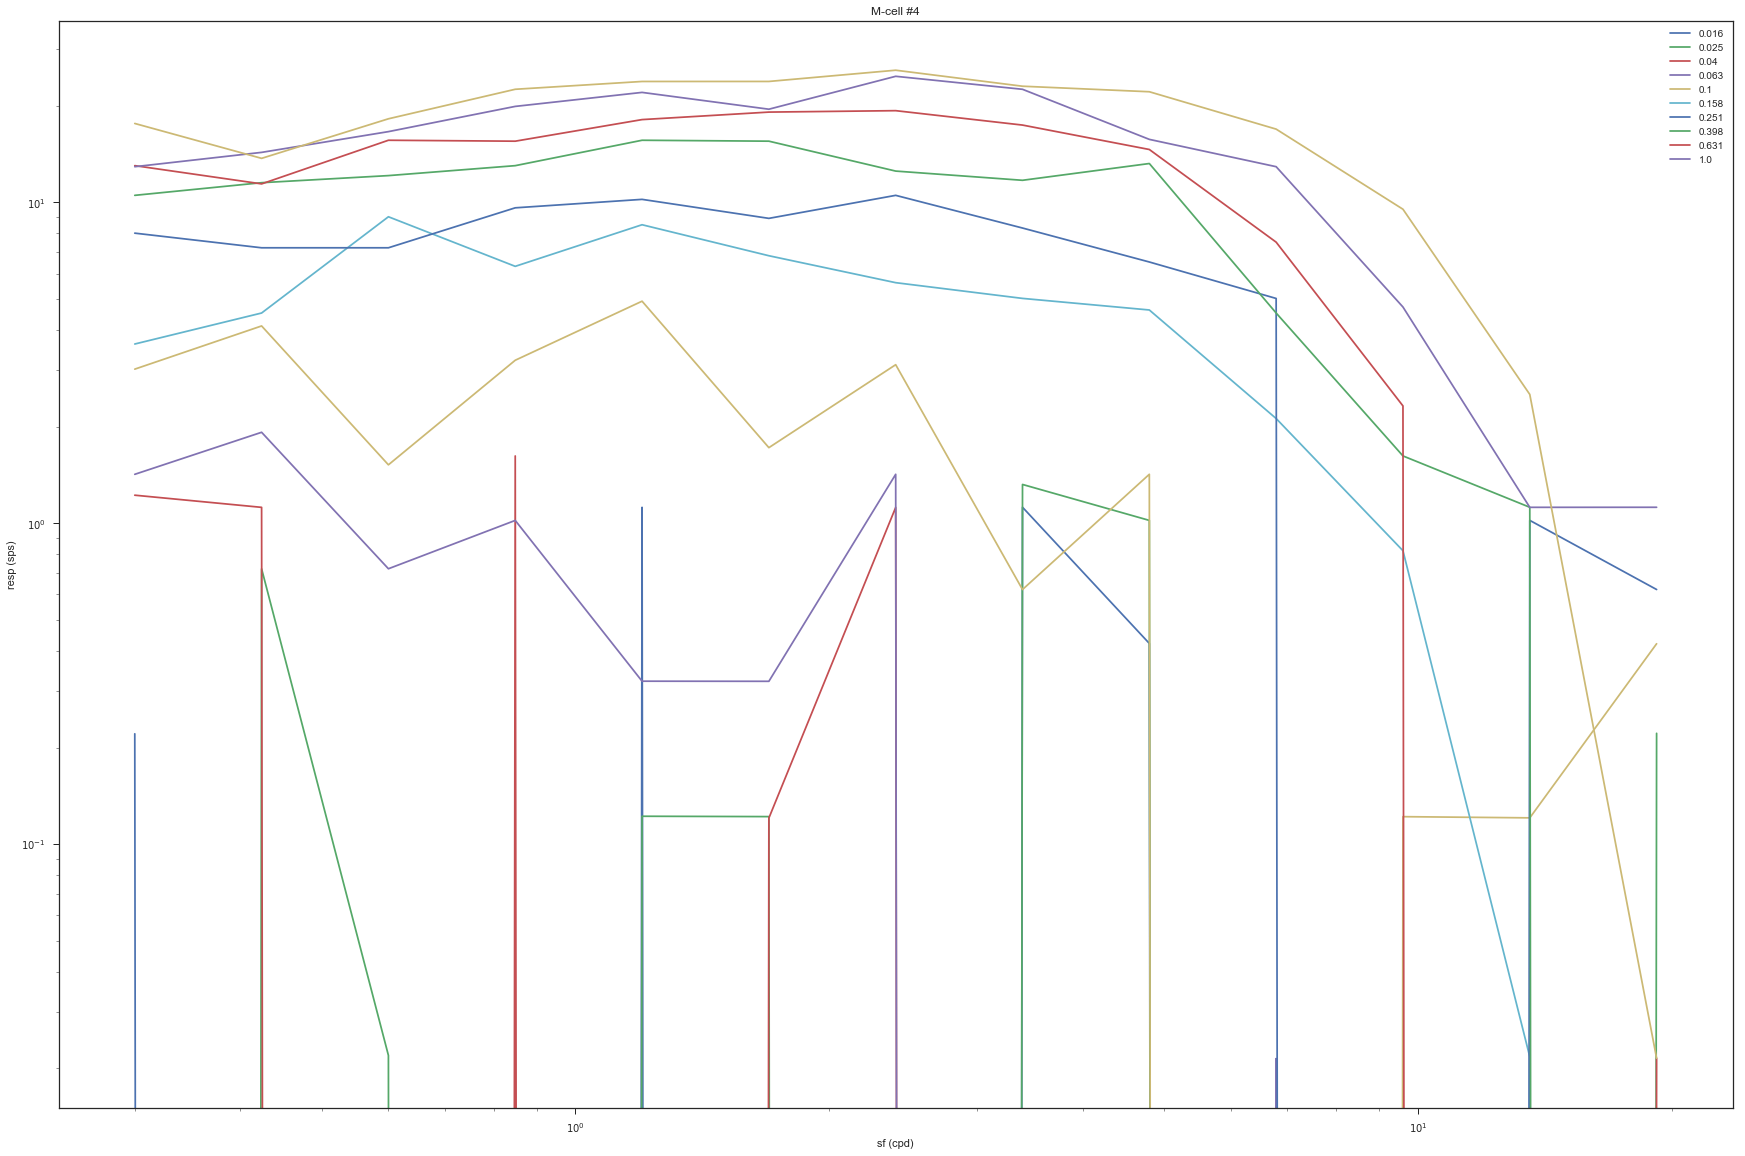

In [38]:
cellNum = 4;
data = sdp[cellNum-1]['data'];
resps, stims = hf.tabulateResponses(data);

f0 = resps[0];
f1 = resps[1];

cons = stims[0];
sfs = stims[1];
sfs_gt0 = np.where(sfs>0)[0];

baseline = hf.blankResp(data)[0];

plt.figure(figsize=(30, 20))
for i in range(len(cons)):
#     gtThresh = np.where((f0['mean'][i, :]-baseline)>1e0)[0];
#     plt.loglog(sfs[gtThresh], f0['mean'][i, gtThresh]-baseline, '-');
    plt.loglog(sfs[sfs_gt0], f0['mean'][i, sfs_gt0]-baseline, '-');
#     plt.errorbar(sfs, f0['mean'][i, :], f0['sem'][i, :], fmt='-');
    plt.xscale('log')
    plt.yscale('log')

plt.xlabel('sf (cpd)');
plt.ylabel('resp (sps)');
plt.title('%s #%d' % (sdp[cellNum-1]['cellType'], cellNum))
plt.legend([str(np.round(x, 3)) for x in cons[1:]], loc=0);

In [6]:
sdp[0]['cellType']

'M-cell'

Response versus contrast curves

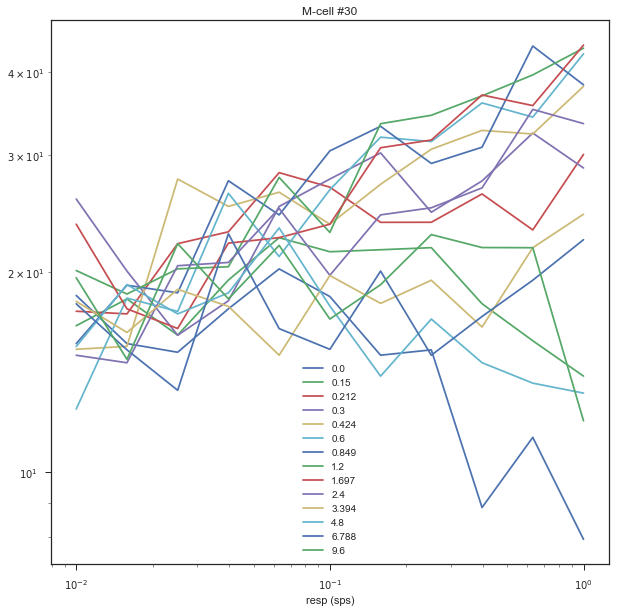

In [107]:
cellNum = 30;
resps, stims = hf.tabulateResponses(sdp[cellNum-1]['data']);

f0 = resps[0];
f1 = resps[1];

cons = stims[0];
sfs = stims[1];

baseline = hf.blankResp(data)[0];

plt.figure(figsize=(10, 10))
for i in range(len(sfs)):
    plt.loglog(cons, f0['mean'][:, i]-baseline, '-');
#     plt.errorbar(cons, f0['mean'][:, i], f0['sem'][:, i], fmt='-');
    plt.xscale('log')
    plt.yscale('log')

plt.xlabel('con (%)');
plt.xlabel('resp (sps)');
plt.title('%s #%d' % (sdp[cellNum-1]['cellType'], cellNum))
plt.legend([str(np.round(x, 3)) for x in sfs], loc=0);

In [11]:
os.getcwd()

'/Users/paulgerald/work/sfDiversity/sfDiv-OriModel/sfDiv-python/LGN'

In [140]:
descrFit = np.load('sach-data/descrFits.npy').item()

In [141]:
descrFit.keys()

dict_keys([0, 3])

In [114]:
autoreload.reload(hf);

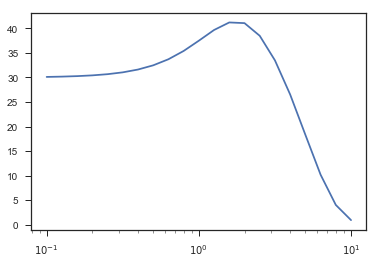

In [113]:
stimz = np.logspace(-1, 1, 21)
zzz, _ = hf.DiffOfGauss(50, 5, 0.4, 0.25, stimz);
plt.semilogx(stimz, zzz);

In [134]:
import descr_fit as dF
autoreload.reload(dF);

In [136]:
haha = dF.fit_descr_DoG(4, '/Users/paulgerald/work/sfDiversity/sfDiv-OriModel/sfDiv-python/LGN/sach-data/')

Doing the work, now
.


/Users/paulgerald/work/sfDiversity/sfDiv-OriModel/sfDiv-python/LGN/helper_fcns.py:44: RuntimeWarning: invalid value encountered in true_divide
  dog_norm = lambda f: dog(f) / norm;


.
.
.
.
.
.
.
.
.
.
reloading descrFits...
saving for cell 4


/Users/paulgerald/work/sfDiversity/sfDiv-OriModel/sfDiv-python/LGN/helper_fcns.py:44: RuntimeWarning: invalid value encountered in true_divide
  dog_norm = lambda f: dog(f) / norm;


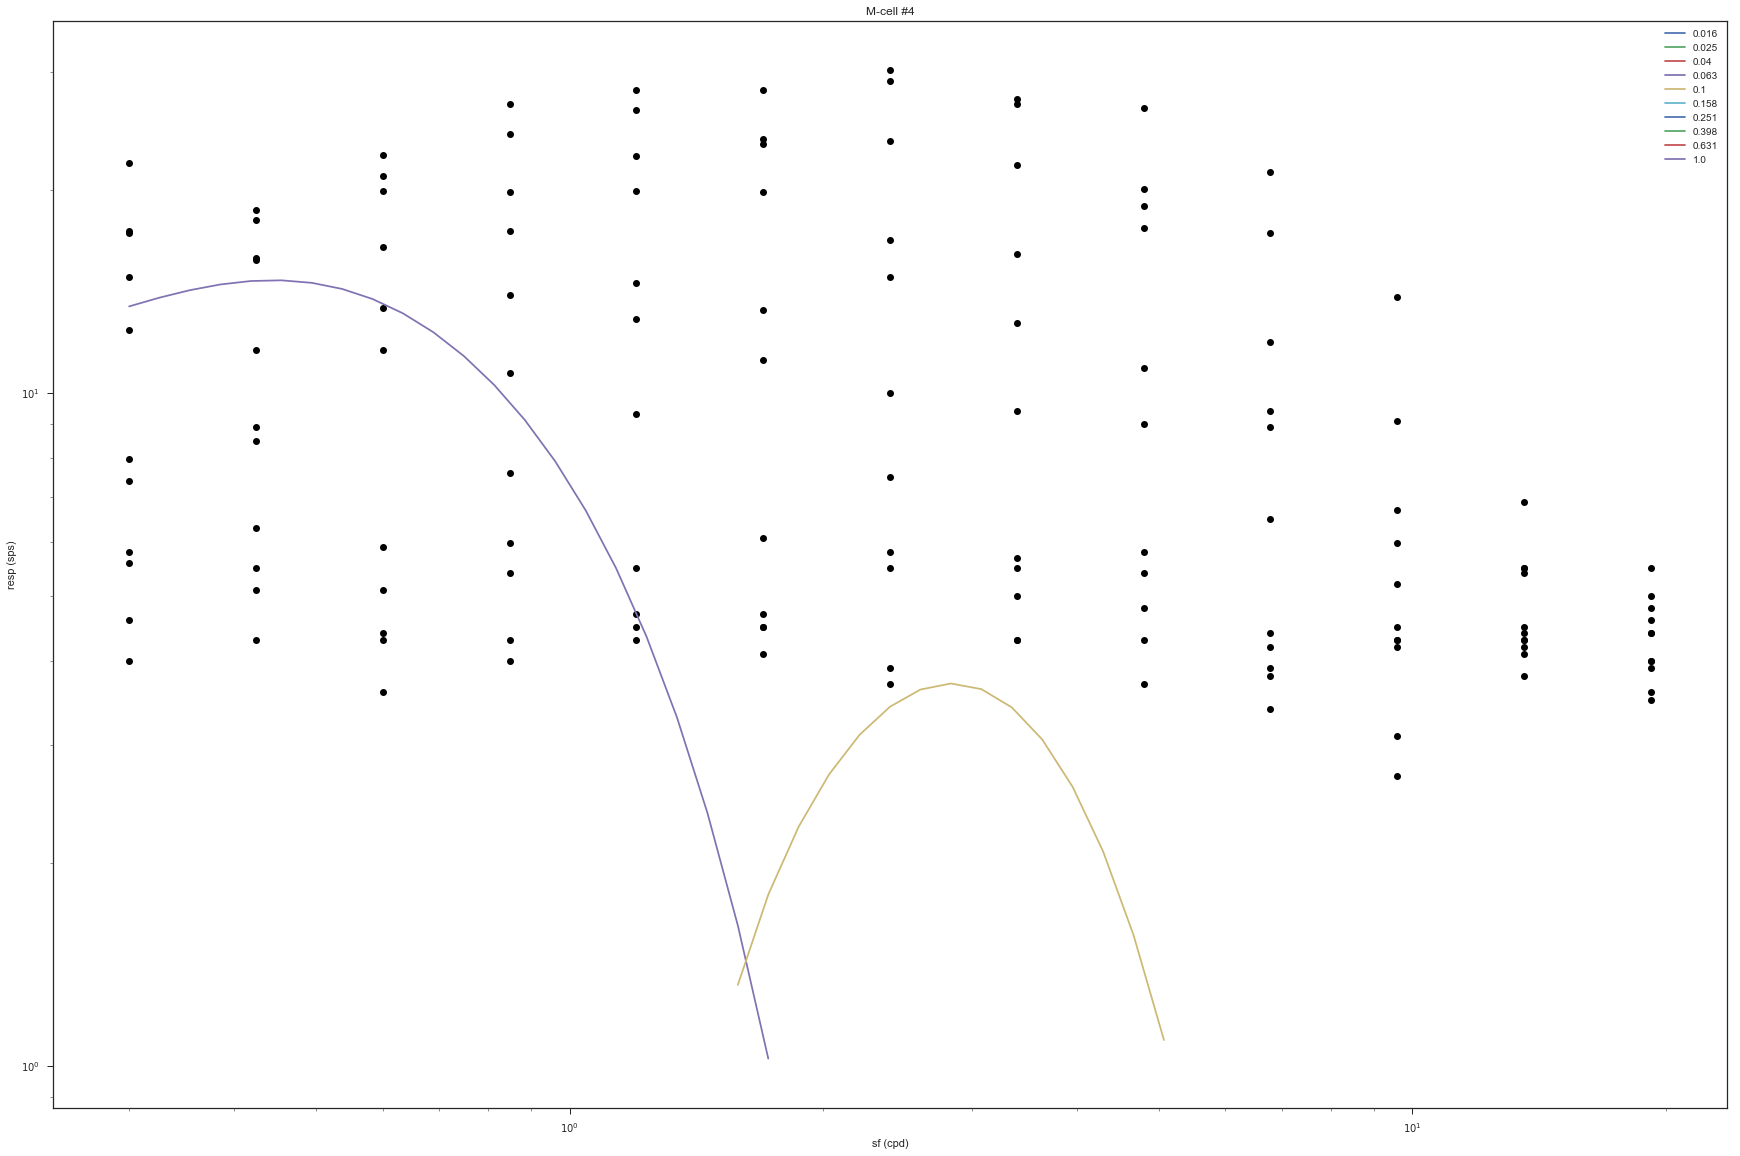

In [146]:
cellNum = 4;
data = sdp[cellNum-1]['data'];
resps, stims, _ = hf.tabulateResponses(data);
currDescr = descrFit[cellNum-1]['params'];

f0 = resps[0];
f1 = resps[1];

cons = stims[0];
sfs = stims[1];
sfs_gt0 = np.where(sfs>0)[0];

plotSfs = np.logspace(np.log10(np.min(sfs[sfs_gt0])), np.log10(np.max(sfs[sfs_gt0])), 51)

baseline = hf.blankResp(data)[0];

plt.figure(figsize=(30, 20))
lines = [];
for i in range(len(cons)):
    dataThresh = np.where((f0['mean'][i, :])>1e0)[0];
    plt.loglog(sfs[dataThresh], f0['mean'][i, dataThresh], 'ko');
#     dataThresh = np.where((f0['mean'][i, :]-baseline)>1e0)[0];
#     plt.loglog(sfs[dataThresh], f0['mean'][i, dataThresh]-baseline, 'ko');
    modResp, _ = np.array(hf.DiffOfGauss(*currDescr[i], plotSfs))
    curr_line = plt.loglog(plotSfs[modResp>1], modResp[modResp>1])[0];
#     plt.errorbar(sfs, f0['mean'][i, :], f0['sem'][i, :], fmt='-');
    plt.xscale('log')
    plt.yscale('log')
    lines.append(curr_line)

plt.xlabel('sf (cpd)');
plt.ylabel('resp (sps)');
plt.title('%s #%d' % (sdp[cellNum-1]['cellType'], cellNum))
plt.legend(lines, [str(np.round(x, 3)) for x in cons[1:]], loc=0);